In [2]:
from matplotlib import pyplot as plt
import pandas as pd
from wordcloud import WordCloud
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# load file
df1 = pd.read_csv("C:/Users/sahil/Desktop/Wordclouds/Retail Parallels/loblaw glassdoor.csv")
df2 = pd.read_csv("C:/Users/sahil/Desktop/Wordclouds/Retail Parallels/canadiantire glassdoor.csv")
df3 = pd.read_csv("C:/Users/sahil/Desktop/Wordclouds/Retail Parallels/walmart glassdoor.csv")

In [4]:
# #length check
# print (len(df1))
# print (len(df2))
# print (len(df3))
# print (len(df1)+len(df2)+len(df3))

In [5]:
#final dataset
df = df3.append((df1.append(df2, ignore_index=True)), ignore_index=True)
# print (len(combined_data))

In [6]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re

top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

desc_lower = df['Pros'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
desc_remove_pun = re.sub('[^A-Za-z]+', ' ', desc_lower)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

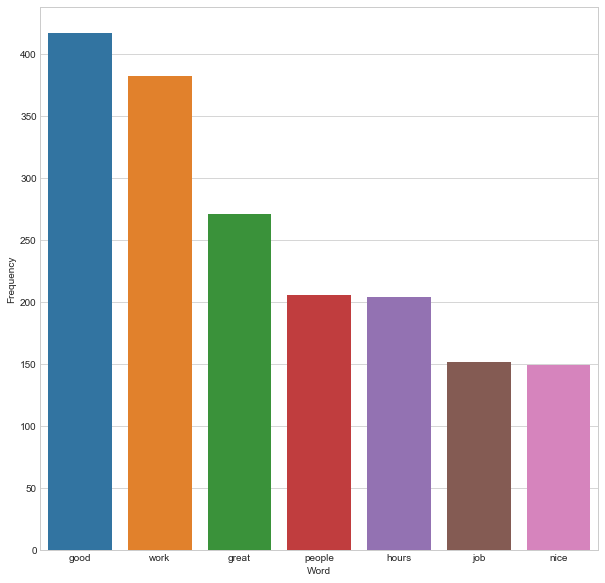

In [7]:
word_tokens_desc = word_tokenize(desc_remove_pun)
filtered_sentence_desc = [w_desc for w_desc in word_tokens_desc if not w_desc in stop_words]
filtered_sentence_desc = []
for w_desc in word_tokens_desc:
    if w_desc not in stop_words:
        filtered_sentence_desc.append(w_desc)

# Remove characters which have length less than 2  
without_single_chr_desc = [word_desc for word_desc in filtered_sentence_desc if len(word_desc) > 2]

# Remove numbers
cleaned_data_desc = [word_desc for word_desc in without_single_chr_desc if not word_desc.isnumeric()]        

# Calculate frequency distribution
word_dist_desc = nltk.FreqDist(cleaned_data_desc)
rslt_desc = pd.DataFrame(word_dist_desc.most_common(top_N),
                    columns=['Word', 'Frequency'])

#print(rslt_desc)
#plt.style.use('ggplot')
#rslt.plot.bar(rot=0)
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word", y="Frequency", data=rslt_desc.head(7))

In [8]:
def wc(data,bgcolor,title):
    plt.figure(figsize = (200,200))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

wc(cleaned_data_desc,'black','Frequent Words' )

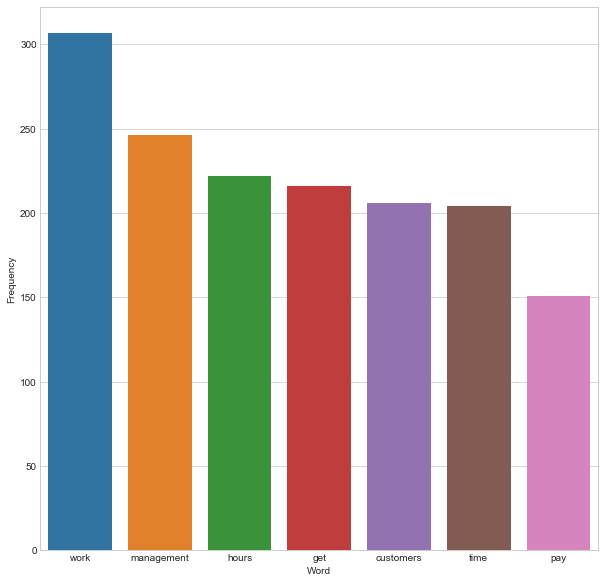

In [9]:
top_N = 100
#convert list of list into text
#a=''.join(str(r) for v in df_usa['title'] for r in v)

desc_lower = df['Cons'].str.lower().str.cat(sep=' ')

# removes punctuation,numbers and returns list of words
desc_remove_pun = re.sub('[^A-Za-z]+', ' ', desc_lower)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

word_tokens_desc = word_tokenize(desc_remove_pun)
filtered_sentence_desc = [w_desc for w_desc in word_tokens_desc if not w_desc in stop_words]
filtered_sentence_desc = []
for w_desc in word_tokens_desc:
    if w_desc not in stop_words:
        filtered_sentence_desc.append(w_desc)

# Remove characters which have length less than 2  
without_single_chr_desc = [word_desc for word_desc in filtered_sentence_desc if len(word_desc) > 2]

# Remove numbers
cleaned_data_desc = [word_desc for word_desc in without_single_chr_desc if not word_desc.isnumeric()]        

# Calculate frequency distribution
word_dist_desc = nltk.FreqDist(cleaned_data_desc)
rslt_desc = pd.DataFrame(word_dist_desc.most_common(top_N),
                    columns=['Word', 'Frequency'])

#print(rslt_desc)
#plt.style.use('ggplot')
#rslt.plot.bar(rot=0)
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word", y="Frequency", data=rslt_desc.head(7))

def wc(data,bgcolor,title):
    plt.figure(figsize = (200,200))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

wc(cleaned_data_desc,'black','Frequent Words' )

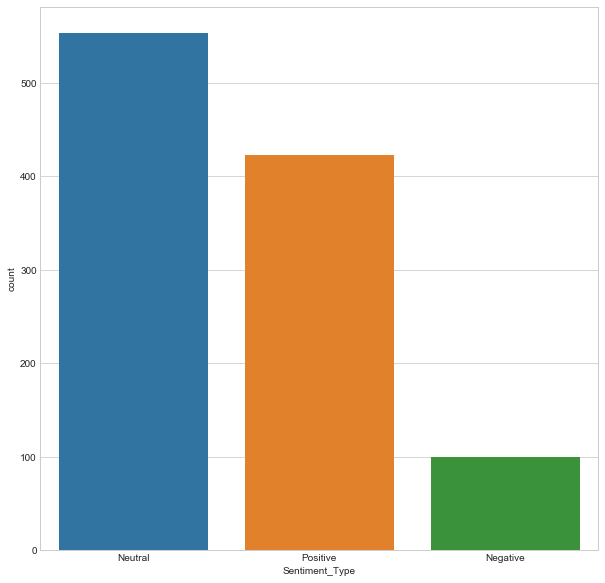

In [11]:
from textblob import TextBlob

bloblist_tags = list()

df_usa_tags_str=df['Review Title']
for row in df_usa_tags_str:
    blob = TextBlob(row)
    bloblist_tags.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_usa_polarity_tags = pd.DataFrame(bloblist_tags, columns = ['sentence','sentiment','polarity'])
 
def f_tags(df_usa_polarity_tags):
    if df_usa_polarity_tags['sentiment'] > 0:
        val = "Positive"
    elif df_usa_polarity_tags['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_usa_polarity_tags['Sentiment_Type'] = df_usa_polarity_tags.apply(f_tags, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=df_usa_polarity_tags)